RQ1: How does the choice of build tool (Maven, Gradle, Javac) impact the energy consumption of CI/CD pipelines?

RQ2: How do different CI/CD platforms and base container images influence energy efficiency during build and deployment?

RQ3: How does the evolution of Kubernetes cluster resources, such as pod counts, correlate with energy consumption?

Build tool variation: Javac, Maven, Gradle
JDK Distribuation: temurin, corretto, zuluu, liberica, microsoft
Java version: 17, 21
Caching: Yes, No 

Variation give: 300 pipeline combination

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# 🔹 Load dataset
file_path = r"C:\Users\boubouthiam.niang\workspace\bl\eco-conception\petclinic-ci-cd-energy-benchmark\petclinic\analysis\data\raw\merged-eco-ci-petclinic-benchmark-build.xlsx"
df = pd.read_excel(file_path)

# Preview
df.head()

,Run,Pipeline Reference,Pipeline Type,Tools,Java Version,JDK Distribution,Cache,avg. CPU utilization [%],Total Energy [Joules],avg. Power [Watts],Duration [Seconds]
0,1,1,Build,Gradle,17,temurin,No,44.3009,382.429,4.60758,91
1,1,2,Build,Gradle,17,temurin,Yes,58.6457,342.253,5.61070,70
2,1,3,Build,Gradle,17,corretto,No,59.7666,344.482,5.64725,69
3,1,4,Build,Gradle,17,corretto,Yes,57.5442,351.667,5.49480,72
4,1,5,Build,Gradle,17,zulu,No,58.9077,356.410,5.56891,72


['Run', 'Pipeline Reference', 'Pipeline Type', 'Tools', 'Java Version', 'JDK Distribution', 'Cache', 'avg. CPU utilization [%]', 'Total Energy [Joules]', 'avg. Power [Watts]', 'Duration [Seconds]']


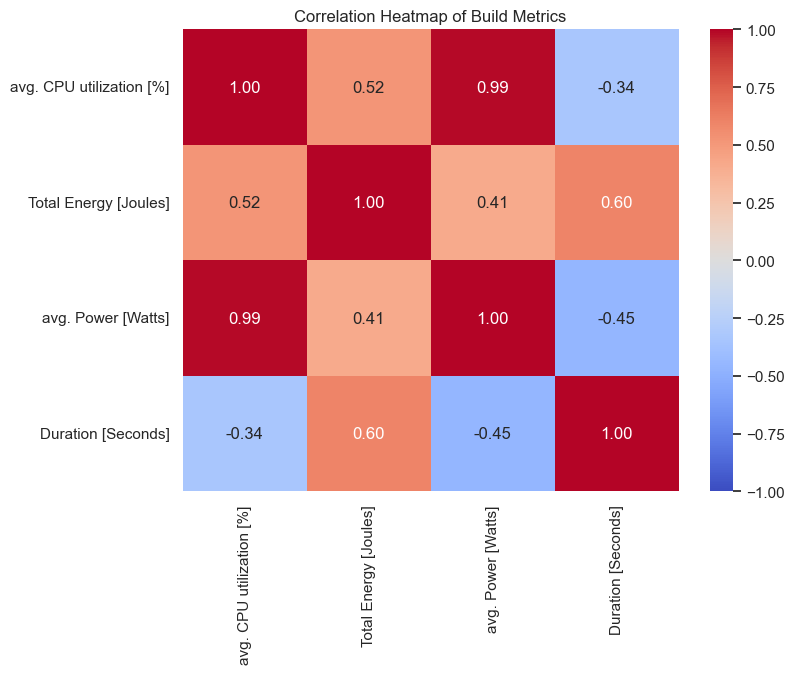

In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Preview column names to check exact names
print(df.columns.tolist())

# Select numeric columns relevant for correlation
numeric_cols = [
    "avg. CPU utilization [%]",  
    "Total Energy [Joules]",
    "avg. Power [Watts]",        
    "Duration [Seconds]"
]

# Ensure all numeric columns exist
for col in numeric_cols:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in dataset. Available columns: {df.columns.tolist()}")

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap of Build Metrics")
plt.savefig("./eco_ci_downloaded_results/correlation_matrix_build.pdf")
plt.show()

In [ ]:
# Compute Summary Metrics
summary_cache = df.groupby(["Tools", "Cache"])[["Total Energy [Joules]", "Duration [Seconds]"]].mean().round(2)
summary_cache


Total Energy [Joules]  Duration [Seconds]
Tools  Cache                                           
Gradle No                    356.70               75.30
       Yes                   366.62               77.06
Javac  No                    165.51               71.48
       Yes                   175.91               75.52
Maven  No                    246.07               88.74
       Yes                   129.19               35.32

C:\Users\boubouthiam.niang\AppData\Local\Temp\ipykernel_29772\4117681564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tools", y="Total Energy [Joules]", data=df, palette="Set2")


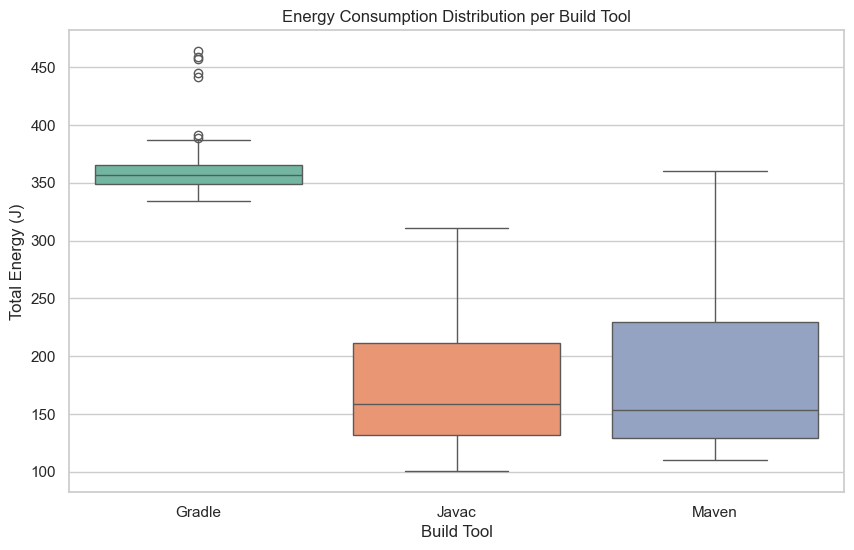

In [ ]:
# Boxplot: Energy Distribution per Tool
plt.figure(figsize=(10,6))
sns.boxplot(x="Tools", y="Total Energy [Joules]", data=df, palette="Set2")
plt.title("Energy Consumption Distribution per Build Tool")
plt.ylabel("Total Energy (J)")
plt.xlabel("Build Tool")
plt.show()


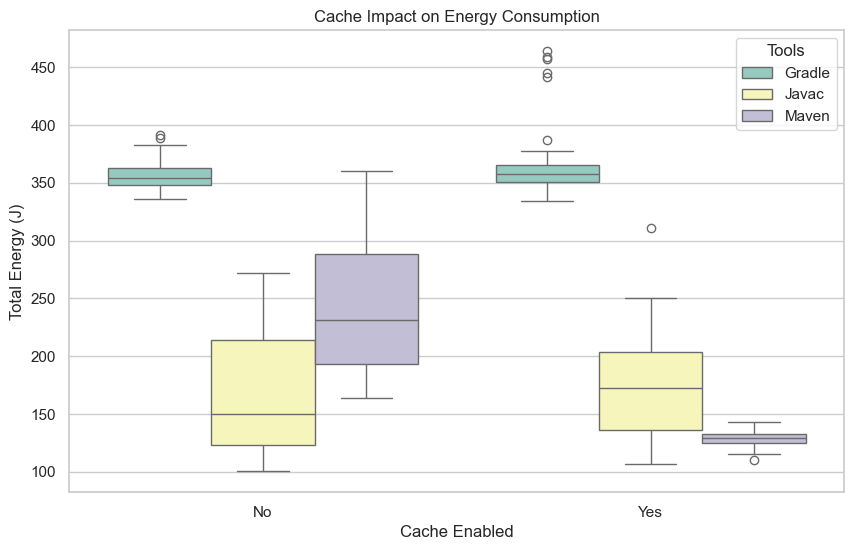

In [ ]:
# Boxplot: Cache Effect on Energy
plt.figure(figsize=(10,6))
sns.boxplot(x="Cache", y="Total Energy [Joules]", hue="Tools", data=df, palette="Set3")
plt.title("Cache Impact on Energy Consumption")
plt.ylabel("Total Energy (J)")
plt.xlabel("Cache Enabled")
plt.show()



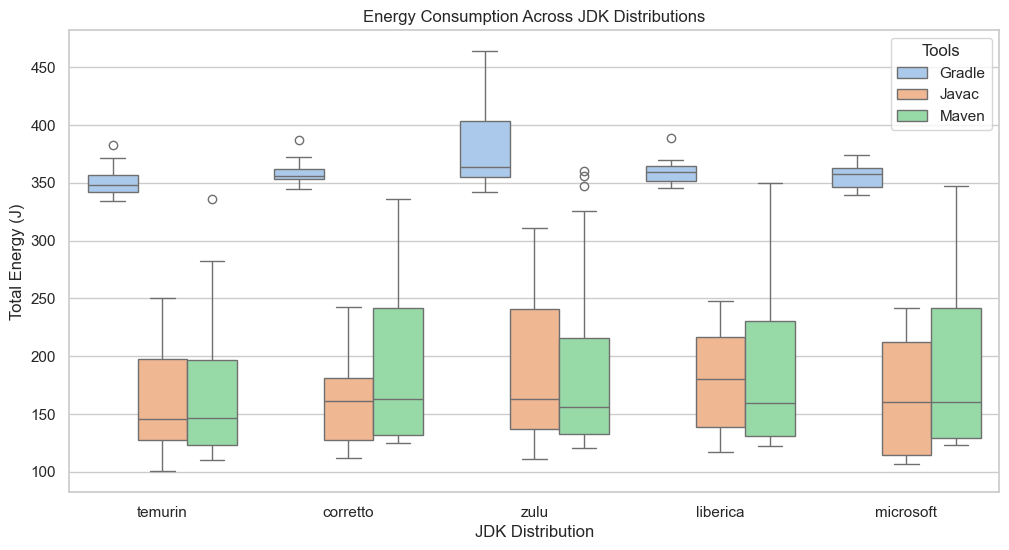

In [ ]:
# Boxplot: JDK Distribution Effect
plt.figure(figsize=(12,6))
sns.boxplot(x="JDK Distribution", y="Total Energy [Joules]", hue="Tools", data=df, palette="pastel")
plt.title("Energy Consumption Across JDK Distributions")
plt.ylabel("Total Energy (J)")
plt.xlabel("JDK Distribution")
plt.savefig("./eco_ci_downloaded_results/energy-boxplot-tool-distribution-build.pdf")
plt.show()



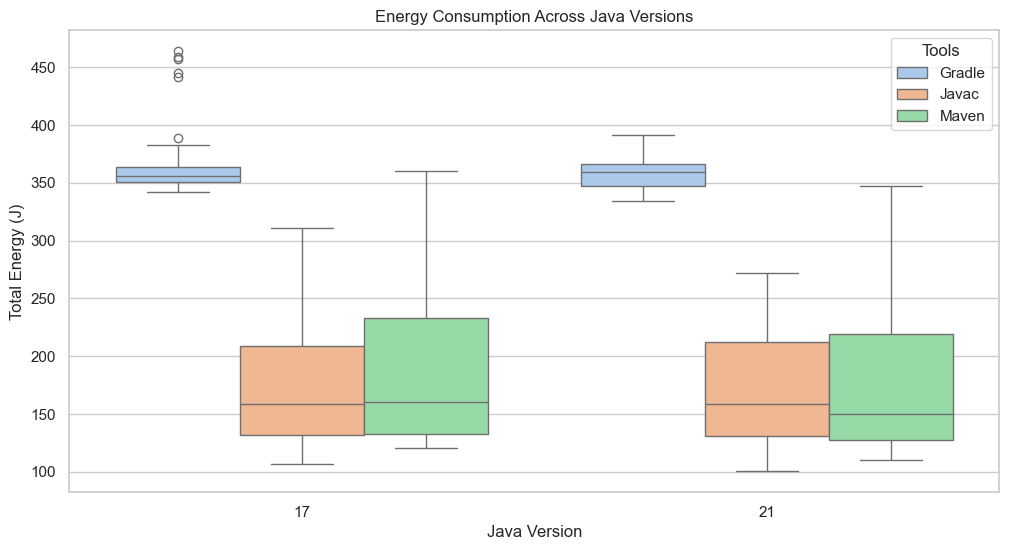

In [ ]:
# Boxplot: Java Version Effect
plt.figure(figsize=(12,6))
sns.boxplot(
    x="Java Version",
    y="Total Energy [Joules]",
    hue="Tools",
    data=df,
    palette="pastel"
)
plt.title("Energy Consumption Across Java Versions")
plt.ylabel("Total Energy (J)")
plt.xlabel("Java Version")
plt.show()


In [ ]:
# Compute Summary Metrics by Java Version
summary_version = df.groupby(["Tools", "Java Version"])[["Total Energy [Joules]", "Duration [Seconds]"]].mean().round(2)
summary_version

Total Energy [Joules]  Duration [Seconds]
Tools  Java Version                                           
Gradle 17                           365.69               75.92
       21                           357.62               76.44
Javac  17                           170.70               72.96
       21                           170.72               74.04
Maven  17                           191.76               62.48
       21                           183.50               61.58

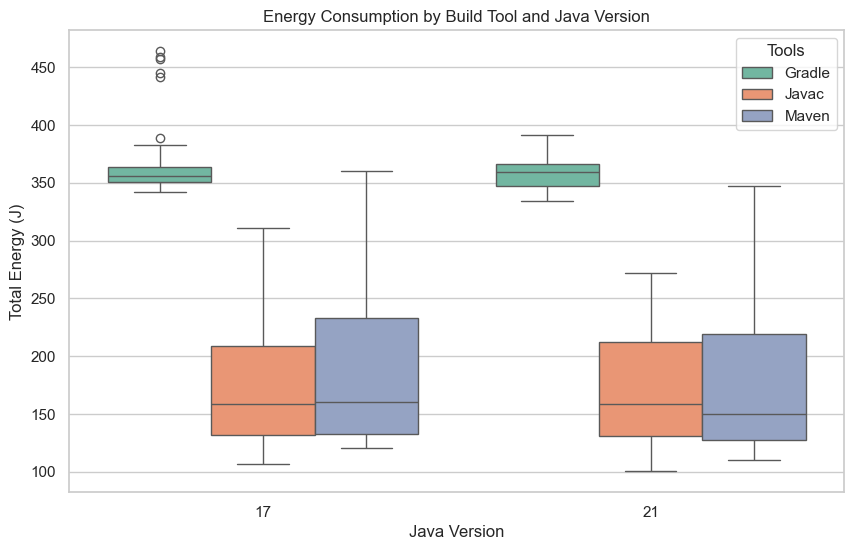

In [ ]:
# Boxplot: Energy by Tool & Java Version
plt.figure(figsize=(10,6))
sns.boxplot(x="Java Version", y="Total Energy [Joules]", hue="Tools", data=df, palette="Set2")
plt.title("Energy Consumption by Build Tool and Java Version")
plt.ylabel("Total Energy (J)")
plt.xlabel("Java Version")
plt.show()


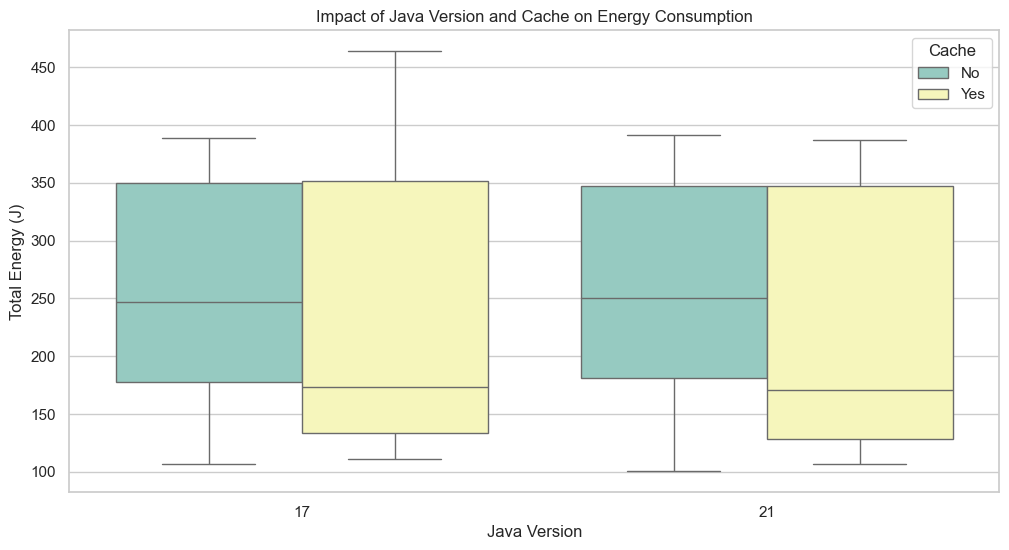

In [ ]:
# Boxplot: Cache × Java Version Effect
plt.figure(figsize=(12,6))
sns.boxplot(x="Java Version", y="Total Energy [Joules]", hue="Cache", data=df, palette="Set3")
plt.title("Impact of Java Version and Cache on Energy Consumption")
plt.ylabel("Total Energy (J)")
plt.xlabel("Java Version")
plt.show()


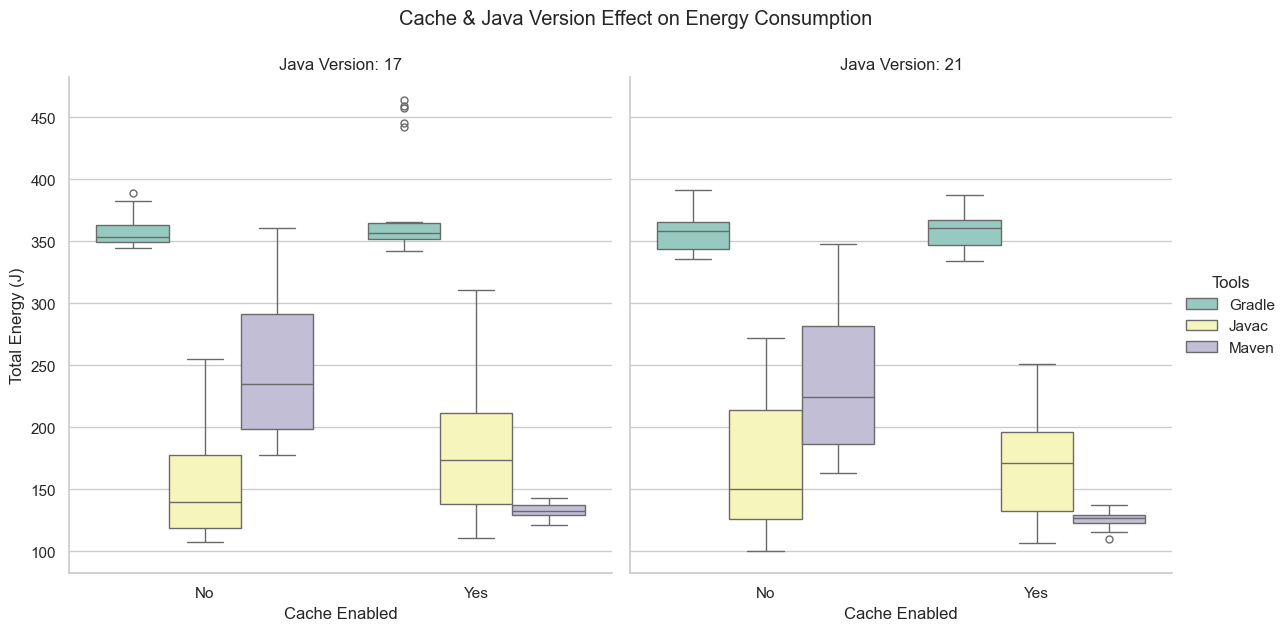

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df,
    x="Cache",
    y="Total Energy [Joules]",
    hue="Tools",
    col="Java Version",       
    kind="box",
    palette="Set3",
    height=6,
    aspect=1
)

g.set_axis_labels("Cache Enabled", "Total Energy (J)")
g.set_titles("Java Version: {col_name}")
plt.suptitle("Cache & Java Version Effect on Energy Consumption", y=1.05)
plt.savefig("./eco_ci_downloaded_results/energy-boxplot-cache-java-version-build.pdf")
plt.show()


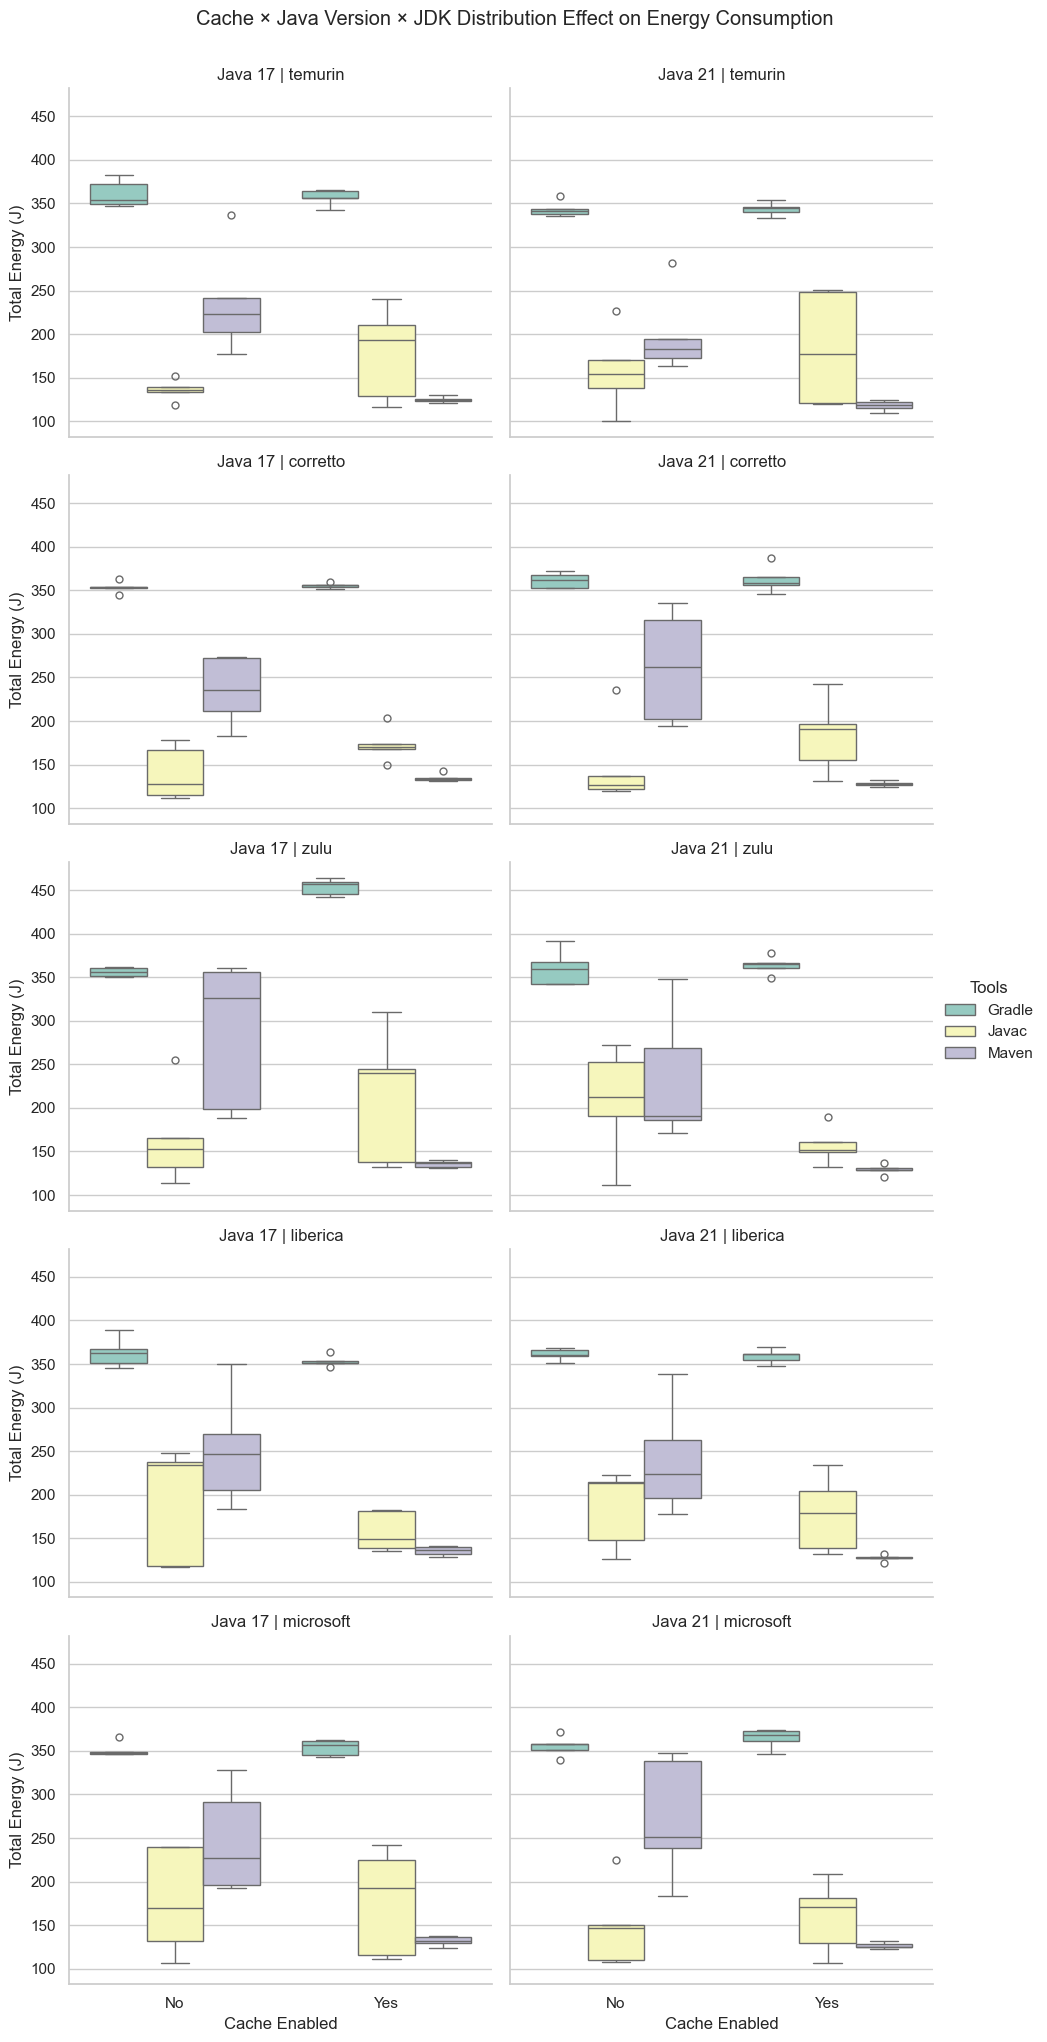

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df,
    x="Cache",
    y="Total Energy [Joules]",
    hue="Tools",
    col="Java Version",       
    row="JDK Distribution",    
    kind="box",
    palette="Set3",
    height=4, 
    aspect=1.2
)

g.set_axis_labels("Cache Enabled", "Total Energy (J)")
g.set_titles("Java {col_name} | {row_name}")
plt.suptitle("Cache × Java Version × JDK Distribution Effect on Energy Consumption", y=1.02)
plt.show()


In [ ]:
# Boxplot: Power Distribution per Tool
plt.figure(figsize=(10,6))
sns.boxplot(x="Tools", y="avg. Power [Watts]", data=df, palette="Set3")
plt.title("Average Power Distribution per Build Tool")
plt.ylabel("Average Power (Watts)")
plt.xlabel("Build Tool")
plt.show()
